# Unbalanced classification

In this homework, we will practice solving a multi-class classification problem using logistic regression with One-vs-Rest and One-vs-One strategies, evaluate the quality of the models, and compare the strategies.

### Task and Data Description

**Context**

In this homework, we are working with data on customer segmentation.

Customer segmentation is the practice of dividing a customer base into groups of individuals who are similar to each other based on certain criteria that are relevant for marketing, such as age, gender, interests, and spending habits.

Companies that use customer segmentation operate under the assumption that each customer is unique and that their marketing efforts will be more effective if they target specific, smaller groups with messages that these consumers will find relevant and that will encourage them to make a purchase. Companies also hope to gain a deeper understanding of their customers' preferences and needs in order to identify what each segment values most, allowing them to tailor marketing materials more accurately to that segment.

**Content**.

An automotive company plans to enter new markets with its existing products (P1, P2, P3, P4, and P5). After extensive marketing research, they concluded that the behavior of the new market is similar to their existing market.

In their existing market, the sales team classified all customers into 4 segments (A, B, C, D). They then conducted segmented outreach and communication with different customer segments. This strategy worked extremely well for them. They plan to use the same strategy in new markets and have identified 2627 new potential customers.

You need to help the manager predict the correct group for the new customers.

In this homework, we will use the data `customer_segmentation_train.csv` [download data](https://drive.google.com/file/d/1VU1y2EwaHkVfr5RZ1U4MPWjeflAusK3w/view?usp=sharing). This is `train.csv` from this [competition](https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation/data?select=train.csv)

**Task 1.** Download and prepare the dataset for analysis. Handle missing values and perform necessary encoding of categorical features. Split into training and testing sets, where the test set is 20%. Remember that it is better to perform all preprocessing on the training set and only use already trained transformers on the test set. However, in this case, since there are not many values in the categories, you can process the original data and then split it - this is simpler. You can also implement processing and model training with pipelines. Choose what is more convenient for you.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder


path = "../../../data/"
df = pd.read_csv(path + 'customer_segmentation_train.csv')

In [342]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [343]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


(None,
 ID                   0
 Gender               0
 Ever_Married       140
 Age                  0
 Graduated           78
 Profession         124
 Work_Experience    829
 Spending_Score       0
 Family_Size        335
 Var_1               76
 Segmentation         0
 dtype: int64)

In [ ]:
# Remove the 'ID' column from the DataFrame.
df.drop('ID', axis=1, inplace=True)

In [345]:
input_cols = df.columns.drop('Segmentation')
target_col = 'Segmentation'

df_inputs = df[input_cols]
df_target = df[target_col]
print(df_inputs.shape, df_target.shape)

(8068, 9) (8068,)


In [346]:
col_numeric = df_inputs.select_dtypes(include=[np.number]).columns.tolist()
col_catgorical = df_inputs.select_dtypes(include='object').columns.tolist()
print(col_numeric, col_catgorical)

['Age', 'Work_Experience', 'Family_Size'] ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']


In [347]:
for col in col_catgorical:
  print(col, df_inputs[col].unique())

Gender ['Male' 'Female']
Ever_Married ['No' 'Yes' nan]
Graduated ['No' 'Yes' nan]
Profession ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Spending_Score ['Low' 'Average' 'High']
Var_1 ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']


In [348]:
df_inputs.Profession.fillna('Other', inplace=True)  
print(df_inputs.Profession.isna().sum())  
df_inputs['Profession'].value_counts(normalize=True)  

0


C:\Users\Olha Shaposhnyk\AppData\Local\Temp\ipykernel_26760\2408797211.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_inputs.Profession.fillna('Other', inplace=True)
C:\Users\Olha Shaposhnyk\AppData\Local\Temp\ipykernel_26760\2408797211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs.Profession.fillna('Other', inplace=Tru

Profession
Artist           0.311849
Healthcare       0.165097
Entertainment    0.117625
Engineer         0.086639
Doctor           0.085275
Lawyer           0.077219
Executive        0.074244
Marketing        0.036192
Homemaker        0.030491
Other            0.015369
Name: proportion, dtype: float64

In [349]:
df_inputs[col_numeric].select_dtypes(include=(np.number)).describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [351]:
def impute_by_mode(df, target_column, col1, col2):
    for var_1 in df[col1].unique():
      for var_2 in df[col2].unique():

          category_mask = (df[col1] == var_1) & (df[col2] == var_2)
          most_frequent_value = df.loc[category_mask, target_column].mode()

          if not most_frequent_value.empty:
                df.loc[category_mask & df[target_column].isnull(), target_column] = most_frequent_value.iloc[0]

    df.fillna({target_column: df[target_column].mode()[0]}, inplace=True)

    return df

Age                  0
Work_Experience    829
Family_Size        335
dtype: int64


<Axes: ylabel='Density'>

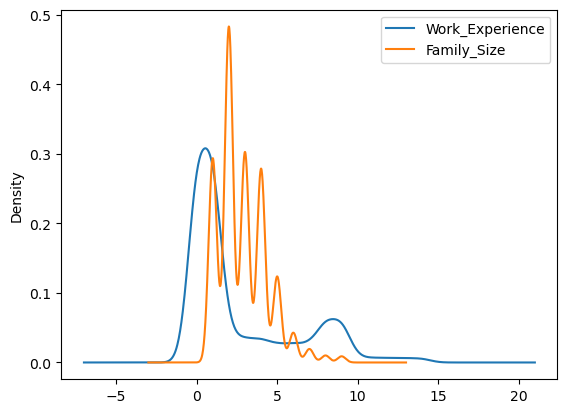

In [352]:
print(df_inputs[col_numeric].isna().sum())
df_inputs[['Work_Experience', 'Family_Size']].plot(kind='kde')

In [353]:
df_inputs['Work_Experience'].unique()

array([ 1., nan,  0.,  4.,  9., 12.,  3., 13.,  5.,  8., 14.,  7.,  2.,
        6., 10., 11.])

In [ ]:
## numerical columns
df_inputs = impute_by_mode(df_inputs, 'Family_Size', 'Age', 'Ever_Married')

C:\Users\Olha Shaposhnyk\AppData\Local\Temp\ipykernel_26760\648402858.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({target_column: df[target_column].mode()[0]}, inplace=True)


In [355]:
for age_group in df_inputs['Age'].unique():
    for proff in df_inputs['Profession'].unique():
        category_mask = (df_inputs['Age'] == age_group) & (df_inputs['Profession'] == proff)

        most_frequent_value = df_inputs.loc[category_mask, 'Work_Experience'].median()
        df_inputs.loc[category_mask & df_inputs['Work_Experience'].isnull(), 'Work_Experience'] = np.round(most_frequent_value)
# For all values for which there are no combinations in our dataset - we fill with the usual median across the entire sample
df_inputs.fillna({'Work_Experience': df_inputs['Work_Experience'].median()}, inplace=True)
print(df_inputs.isna().sum())

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession           0
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1               76
dtype: int64


C:\Users\Olha Shaposhnyk\AppData\Local\Temp\ipykernel_26760\3256067795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs.fillna({'Work_Experience': df_inputs['Work_Experience'].median()}, inplace=True)


In [356]:
scaler = StandardScaler()
df_inputs[col_numeric] = scaler.fit_transform(df_inputs[col_numeric])

C:\Users\Olha Shaposhnyk\AppData\Local\Temp\ipykernel_26760\1053401831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs[col_numeric] = scaler.fit_transform(df_inputs[col_numeric])


In [357]:
## categorical columns

df_inputs = impute_by_mode(df_inputs, 'Ever_Married', 'Age', 'Family_Size')
df_inputs = impute_by_mode(df_inputs, 'Graduated', 'Age', 'Profession')
df_inputs = impute_by_mode(df_inputs, 'Var_1', 'Spending_Score', 'Profession')

C:\Users\Olha Shaposhnyk\AppData\Local\Temp\ipykernel_26760\648402858.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({target_column: df[target_column].mode()[0]}, inplace=True)
C:\Users\Olha Shaposhnyk\AppData\Local\Temp\ipykernel_26760\648402858.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({target_column: df[target_column].mode()[0]}, inplace=True)
C:\Users\Olha Shaposhnyk\AppData\Local\Temp\ipykernel_26760\648402858.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [358]:
print(df_inputs[['Ever_Married', 'Family_Size','Graduated','Var_1']].isna().sum())  # Print the count of missing values for specified columns

Ever_Married    0
Family_Size     0
Graduated       0
Var_1           0
dtype: int64


In [359]:
cols_onehot = df_inputs.select_dtypes(include='object').columns.tolist()
cols_onehot.remove('Spending_Score')
print(cols_onehot)

['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']


In [360]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop = 'if_binary')
encoder.fit(df_inputs[cols_onehot])
encoded_cols = list(encoder.get_feature_names_out(cols_onehot))
print(encoded_cols)
df_inputs[encoded_cols] = encoder.transform(df_inputs[cols_onehot])

['Gender_Male', 'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Profession_Other', 'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7']


In [361]:
df_inputs.Spending_Score.unique()

array(['Low', 'Average', 'High'], dtype=object)

In [362]:
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Average', 'High']])
df_inputs['Spending_Score'] = ordinal_encoder.fit_transform(df_inputs[['Spending_Score']])

In [363]:
pd.set_option("display.max_columns", None)
display(df_inputs)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Other,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,Male,No,-1.284623,No,Healthcare,-0.463482,0.0,0.772790,Cat_4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Female,Yes,-0.327151,Yes,Engineer,-0.463482,1.0,0.114061,Cat_4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Female,Yes,1.408268,Yes,Engineer,-0.463482,0.0,-1.203398,Cat_6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Male,Yes,1.408268,Yes,Lawyer,-0.767175,2.0,-0.544668,Cat_6,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Female,Yes,-0.207467,Yes,Entertainment,0.751290,2.0,2.090249,Cat_6,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,-1.284623,No,Other,-0.767175,0.0,2.748978,Cat_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8064,Male,No,-0.506677,No,Executive,0.143904,0.0,0.772790,Cat_4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8065,Female,No,-0.626361,Yes,Healthcare,-0.463482,0.0,-1.203398,Cat_6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8066,Female,No,-0.985413,Yes,Healthcare,-0.463482,0.0,0.772790,Cat_6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [364]:
cols_train = col_numeric + ['Spending_Score'] + encoded_cols 
cols_train

['Age',
 'Work_Experience',
 'Family_Size',
 'Spending_Score',
 'Gender_Male',
 'Ever_Married_Yes',
 'Graduated_Yes',
 'Profession_Artist',
 'Profession_Doctor',
 'Profession_Engineer',
 'Profession_Entertainment',
 'Profession_Executive',
 'Profession_Healthcare',
 'Profession_Homemaker',
 'Profession_Lawyer',
 'Profession_Marketing',
 'Profession_Other',
 'Var_1_Cat_1',
 'Var_1_Cat_2',
 'Var_1_Cat_3',
 'Var_1_Cat_4',
 'Var_1_Cat_5',
 'Var_1_Cat_6',
 'Var_1_Cat_7']

In [365]:
train_inputs = df_inputs[cols_train]
train_inputs

,Age,Work_Experience,Family_Size,Spending_Score,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Other,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,-1.284623,-0.463482,0.772790,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.327151,-0.463482,0.114061,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.408268,-0.463482,-1.203398,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.408268,-0.767175,-0.544668,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.207467,0.751290,2.090249,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,-1.284623,-0.767175,2.748978,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8064,-0.506677,0.143904,0.772790,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8065,-0.626361,-0.463482,-1.203398,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8066,-0.985413,-0.463482,0.772790,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_inputs, df_target, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6454, 24), (1614, 24), (6454,), (1614,))

# Conclusions 1

- Dataset dimensions: 11 columns (of which 1 is the class label and another column is ID which we remove, so we have 9 features) and 8068 rows of records.
- Let's look at which columns have missing data.

|column           |Missing value |
|-----------------|--------|
|Ever_Married      |140|
|Graduated         | 78|
|Profession        |124|
|Work_Experience   |829|
|Family_Size       |335|
|Var_1             | 76|

- For handling missing values, we created a function *impute_by_mode* where we will use the mode to fill in the gaps, especially for categorical data. We pass two columns that can significantly influence the column with missing values, and based on the mode in these defined groups, we fill in the gaps. We find the mode for cases that are similar to each other and fill in the missing values. If such groups do not exist, we use the global mode.

- We identify numerical *['Age', 'Work_Experience', 'Family_Size']* and process the missing values.
    - Work_Experience - according to descriptive statistics, at least 25% of the records have 0 years of experience. We group the column by Profession and Age (these columns seem to be those that can greatly influence your experience) and fill in the missing values with the median. The distribution of this column is multimodal (with peaks at 0 and 7), so we choose the median relative to the groups.
    - Family_Size - we fill in the mode based on the family size and how many years it has existed (grouping by 'Age', 'Ever_Married').
- We standardize the numerical columns using *StandardScaler*.

- We identify categorical *['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']* and process the missing values.
    - Ever_Married - similarly, we fill in the mode based on groups by 'Age', 'Family_Size'. Alternatively, it could have been left as *'Other'*.
    - Graduated - similarly, we fill in the mode based on groups by 'Age', 'Profession'. Alternatively, it could have been left as *'Other'*.
    - Profession - has 9 unique values, among which **Artist=31%** stands out significantly. All missing values are filled with *'Other'*, which will account for 1.5% of all data.
    - Var_1 - the category has 7 columns. Ideally, we would group the data by all other columns, but we will choose only two for grouping 'Spending_Score', 'Profession' to fill in the mode.
- We encode our categorical columns using *OneHotEncoder* (excluding Spending_Score).
- We encode Spending_Score using *OrdinalEncoder* because it contains ordinal values low-medium-high ['Low', 'Average', 'High'] = 0,1,2.

- We form our final dataset which includes: col_numeric + ['Spending_Score'] + encoded_cols.
- Segmentation - target.

**Task 2. It is important to read the entire wording of this task carefully to the end!**

Apply the SMOTE and SMOTE-Tomek resampling methods from the imbalanced-learn library to the training sample. As a result, you should have 2 training sets: one with upsampling using SMOTE and the other with resampling using SMOTE-Tomek.

Attention! In our dataset, there are both categorical and regular numerical data. Basic SMOTE will not work correctly with categorical data, but there is a modification that will. Therefore, this task has 2 parts:

1. Apply basic SMOTE only to NON-categorical features.

2. Review the information about the [SMOTENC](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) method and use this method in this task. You will receive +3 points for this task, and it is recommended for execution.

  **Hint**: To use SMOTENC, you need to create a variable that contains the indices of the features that are categorical (their number among the columns) and pass it when initializing an instance of the `SMOTENC(..., categorical_features=cat_feature_indices)` class.
  
  You can also consider using the variation of SMOTE that works ONLY with categorical features [SMOTEN](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTEN.html).

In [ ]:
from imblearn.over_sampling import SMOTE, SMOTENC, SMOTEN
from imblearn.combine import SMOTETomek

In [378]:
categorical_indices = [train_inputs.columns.get_loc(col) for col in (['Spending_Score'] + encoded_cols)]
print("Cat.Indices:", categorical_indices)

Cat.Indices: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [380]:
train_inputs.shape, y_train.value_counts(normalize=True)

((8068, 24),
 Segmentation
 D    0.277967
 C    0.246359
 A    0.244964
 B    0.230710
 Name: proportion, dtype: float64)

In [381]:
smote_cat = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_train_smoteCAT, y_train_smoteCAT = smote_cat.fit_resample(X_train, y_train)
X_train_smoteCAT.shape, y_train_smoteCAT.value_counts(normalize=True)

((7176, 24),
 Segmentation
 A    0.25
 D    0.25
 B    0.25
 C    0.25
 Name: proportion, dtype: float64)

In [382]:
smoteTom = SMOTETomek(random_state=42)  
X_train_smoteTOM, y_train_smoteTOM = smoteTom.fit_resample(X_train, y_train)  
X_train_smoteTOM.shape, y_train_smoteTOM.value_counts(normalize=True)

((5802, 24),
 Segmentation
 D    0.256291
 C    0.255946
 B    0.245088
 A    0.242675
 Name: proportion, dtype: float64)

In [383]:
smote_num = SMOTE(random_state=42)
X_train_smoteNUM, y_train_smoteNUM = smote_num.fit_resample(X_train[col_numeric], y_train)
X_train_smoteNUM.shape, y_train_smoteNUM.value_counts(normalize=True)

((7176, 3),
 Segmentation
 A    0.25
 D    0.25
 B    0.25
 C    0.25
 Name: proportion, dtype: float64)

# Conclusions 2

- We consider the columns ['Spending_Score'] + encoded_cols as categorical and find their indices = from 3 to 23
- The original distribution among classes is approximately equal, only category D stands out slightly in quantity
  - D   = 0.28
  - C   = 0.25
  - A   = 0.24
  - B   = 0.23

- To use numerical and categorical data, we use SMOTENC, where we pass the indices of our columns SMOTENC(categorical_features=categorical_indices, random_state=42). Thus, all classes are now evenly distributed at 25%
- Next, we similarly use SMOTETomek, because after SMOTE the algorithm additionally removes connections, the distribution of classes has changed slightly
  - D    0.256
  - C    0.256
  - B    0.245
  - A    0.243

- Also, for an additional experiment, we will use SMOTE only on numerical columns, meaning that further training of the classifier will occur only on 3 columns for this case (X_train[col_numeric])

**Task 3**.
  1. Train a logistic regression model using the One-vs-Rest strategy with logistic regression on the original data, balanced with SMOTE, and balanced with Smote-Tomek.  
  2. Measure the quality of each trained model using `sklearn.metrics.classification_report`.
  3. Write down which metric you chose for comparing the models.
  4. Which model is the best?
  5. If there is no significant difference between the models - write your hypothesis as to why?

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

In [384]:
def model_train_sample(X, y, validation):
    log = LogisticRegression(random_state=42)
    ovr = OneVsRestClassifier(log)
    ovr.fit(X, y)
    predict = ovr.predict(validation)
    return predict

# Original probabilities
prob_original = model_train_sample(X_train, y_train, X_val)
# Probabilities with SMOTE for categorical features
prob_smoteCAT = model_train_sample(X_train_smoteCAT, y_train_smoteCAT, X_val)
# Probabilities with SMOTE for TOM
prob_smoteTOM = model_train_sample(X_train_smoteTOM, y_train_smoteTOM, X_val)
# Probabilities with SMOTE for numerical features
prob_smoteNUM = model_train_sample(X_train_smoteNUM, y_train_smoteNUM, X_val[col_numeric])

In [385]:
print(f'ORIGINAL REPORT\n{classification_report(y_val, prob_original)}')

ORIGINAL REPORT
              precision    recall  f1-score   support

           A       0.41      0.47      0.44       391
           B       0.43      0.12      0.18       369
           C       0.46      0.65      0.54       380
           D       0.65      0.71      0.68       474

    accuracy                           0.50      1614
   macro avg       0.49      0.49      0.46      1614
weighted avg       0.50      0.50      0.47      1614



In [386]:
print(f'SMOTENC REPORT\n{classification_report(y_val, prob_smoteCAT)}')

SMOTENC REPORT
              precision    recall  f1-score   support

           A       0.41      0.50      0.45       391
           B       0.39      0.15      0.22       369
           C       0.46      0.63      0.53       380
           D       0.68      0.68      0.68       474

    accuracy                           0.50      1614
   macro avg       0.48      0.49      0.47      1614
weighted avg       0.50      0.50      0.48      1614



In [387]:
print(f'SMOTE-TOMEK REPORT\n{classification_report(y_val, prob_smoteTOM)}')

SMOTE-TOMEK REPORT
              precision    recall  f1-score   support

           A       0.42      0.51      0.46       391
           B       0.41      0.17      0.24       369
           C       0.46      0.63      0.53       380
           D       0.68      0.68      0.68       474

    accuracy                           0.51      1614
   macro avg       0.49      0.50      0.48      1614
weighted avg       0.50      0.51      0.49      1614



In [389]:
print(f'SMOTE NUMERICAL REPORT\n{classification_report(y_val, prob_smoteNUM)}')

SMOTE NUMERICAL REPORT
              precision    recall  f1-score   support

           A       0.32      0.34      0.33       391
           B       0.24      0.11      0.15       369
           C       0.37      0.38      0.38       380
           D       0.52      0.71      0.60       474

    accuracy                           0.41      1614
   macro avg       0.36      0.39      0.37      1614
weighted avg       0.37      0.41      0.38      1614



# Conclusions 3

- We will train 4 classifiers: using the original data without balancing, SMOTENC, SMOTE-TOMEK, and SMOTE only with numerical columns

|Method                 |  Macro Avg F1-Score|
|-----------------------|-----|
|Original               |  0.46 | 
|SMOTENC cat+num        | 0.47 | 
|SMOTE-TOMEK            | 0.48 | 
|SMOTE Numerical only   |  0.37 | 


- As the main metric, we will use *Macro Avg F1-Score*, as it is more informative than accuracy and provides a general representation of model precision, balancing between precision and recall.
- Thus, SMOTE-TOMEK performed the best, handling classification for class *B = F1 = 0.24* better; this is the most "problematic" class, as all classifiers showed low performance for it. Meanwhile, SMOTENC is only 0.01 behind it. It can be said that both of these models performed well, although SMOTE-TOMEK has a slight advantage.

- The model on the original data has a slightly lower accuracy of 0.46, but a much lower score for the local class B = 0.18. While all other classes have a local f1-score of at least above 0.44.
- SMOTE only with numerical features showed the worst accuracy, which may indicate that categorical features in this dataset are of great importance. Therefore, it is advisable to use the entire dataset for analysis.

`If there is no significant difference between the models - write your hypothesis, why?`
- In my opinion, SMOTENC and SMOTE-TOMEK showed almost the same result because there were almost no Tomek links in the data, or they were arranged in such a way that after removing some points, the overall class distribution remained approximately the same, and this did not affect the construction of boundaries between classes.
- Similarly, compared to the original dataset, it can be assumed that since the data were already distributed almost equally, their balancing did not lead to significant changes.